SRN : PES1UG21CS807
NAME  : BHAVANA S
SECTION : 'C'

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn as sk
import tensorflow as tf

from hmac import trans_36
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

from time import time
from datetime import datetime
from random import triangular

In [1]:
 my_df= pd.read_csv(r'/content/drive/MyDrive/Bhavanii/MI_assignment_online_retail.csv')
my_df.head()

NameError: name 'pd' is not defined

In [48]:
my_df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity              float64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [ ]:
my_df.info()

In [ ]:
my_df.describe()

In [ ]:

print ("Unique customers stock data in the data: %d"%len(my_df.StockCode.unique()))

In [49]:

my_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [50]:
#null values -> boolean 
my_df=my_df[my_df['CustomerID'].notna()]
my_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [51]:
#training data
start=pd.Timestamp(2010,12,1)
end=pd.Timestamp(2011,8,31)
train=my_df[my_df['InvoiceDate']>=start]
train=train[train['InvoiceDate']<=end]
train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365.0,71053.0,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365.0,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
#labelling the customers who have not made purchase in given period as churn and notchurn for those who made
start_date=pd.Timestamp(2011,9,1)
end_date=pd.Timestamp(2011,12,31)
churn=my_df[my_df['InvoiceDate']>=start_date]
churn=churn[churn['InvoiceDate']<=end_date]
churn.head()

NameError: name 'df' is not defined

In [53]:
training_unique=train['CustomerID'].unique()
churn_unique=churn['CustomerID'].unique()

ischurnlis=[]
for id in training_unique:
    if id in churn_unique:
        ischurnlis.append(id)

In [54]:
train=train.assign(isChurn=[1 if x in ischurnlis else 0 for x in train['CustomerID']])
train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,isChurn
0,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0
1,536365.0,71053.0,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
2,536365.0,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0
3,536365.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
4,536365.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0


In [55]:
#to assigning unique number to country
countries_dic={}

countries=train['Country'].unique()
for i,y in enumerate(countries):
    countries_dic[y]=i

In [56]:
train['Country']=[countries_dic[x] for x in train['Country']]
train['Country'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35], dtype=int64)

In [57]:
#replacing '\D' with '' for StockCode column
train['StockCode']=train['StockCode'].str.replace('\D', '')

C:\Users\Guru\AppData\Local\Temp\ipykernel_5768\3240662381.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train['StockCode']=train['StockCode'].str.replace('\D', '')


In [58]:
train=train[train['StockCode']!='']
train['StockCode'] = train['StockCode'].fillna(0)
train['StockCode']=train['StockCode'].astype(int)

In [59]:
#feature creation 
#date is also a feature
#dropping irrelevant columns
train['month']=train['InvoiceDate'].dt.month.astype(int)
train['year']=train['InvoiceDate'].dt.year.astype(int)
train['day']=train['InvoiceDate'].dt.day.astype(int)
train['hour']=train['InvoiceDate'].dt.hour.astype(int)

train=train.drop(['InvoiceDate'],axis=1)
train=train.drop(['Description'],axis=1)
train=train.drop(['InvoiceNo'],axis=1)

In [61]:
train.head()

,StockCode,Quantity,UnitPrice,CustomerID,Country,isChurn,month,year,day,hour
0,85123,6.0,2.55,17850.0,0,0,12,2010,1,8
1,0,6.0,3.39,17850.0,0,0,12,2010,1,8
2,84406,8.0,2.75,17850.0,0,0,12,2010,1,8
3,84029,6.0,3.39,17850.0,0,0,12,2010,1,8
4,84029,6.0,3.39,17850.0,0,0,12,2010,1,8


<AxesSubplot:>

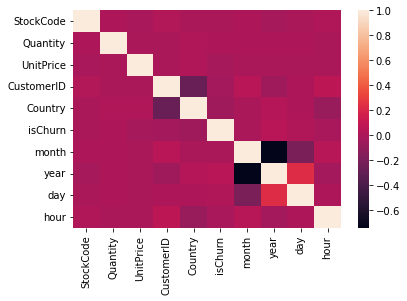

In [63]:
#heatmap for correlation
sns.heatmap(train.corr())

In [64]:
#normalising the dataset
scaler = StandardScaler()
train['StockCode']=scaler.fit_transform(train[['StockCode']])
train['CustomerID']=scaler.fit_transform(train[['CustomerID']])
train['Country']=scaler.fit_transform(train[['Country']])
train['Quantity']=scaler.fit_transform(train[['Quantity']])
train['UnitPrice']=scaler.fit_transform(train[['UnitPrice']])
train['month']=scaler.fit_transform(train[['month']])
train['year']=scaler.fit_transform(train[['year']])
train['day']=scaler.fit_transform(train[['day']])
train['hour']=scaler.fit_transform(train[['hour']])
train.head()

,StockCode,Quantity,UnitPrice,CustomerID,Country,isChurn,month,year,day,hour
0,3.531062,-0.029790,-0.091041,1.48702,-0.254335,0,2.050745,-2.757747,-1.649149,-2.013723
1,-0.306431,-0.029790,0.069807,1.48702,-0.254335,0,2.050745,-2.757747,-1.649149,-2.013723
2,3.498738,-0.020883,-0.052744,1.48702,-0.254335,0,2.050745,-2.757747,-1.649149,-2.013723
3,3.481743,-0.029790,0.069807,1.48702,-0.254335,0,2.050745,-2.757747,-1.649149,-2.013723
4,3.481743,-0.029790,0.069807,1.48702,-0.254335,0,2.050745,-2.757747,-1.649149,-2.013723


In [66]:
#dropping for training dataset that we will predict later
y=train['isChurn']
x=train.drop(['isChurn'],axis=1)

In [67]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [68]:
#decision tree construction
model1=DecisionTreeClassifier()
model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [69]:
y_pred = model1.predict(X_test)

In [70]:
#evaluation using classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8800
           1       1.00      1.00      1.00     37226

    accuracy                           0.99     46026
   macro avg       0.99      0.99      0.99     46026
weighted avg       0.99      0.99      0.99     46026



In [71]:
#svm implementation
model2=LinearSVC(max_iter=1000,verbose=True)
model2.fit(X_train,y_train)

[LibLinear]

C:\Users\Guru\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(verbose=True)

In [72]:
y_pred = model2.predict(X_test)

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.00      0.00      8800
           1       0.81      1.00      0.89     37226

    accuracy                           0.81     46026
   macro avg       0.62      0.50      0.45     46026
weighted avg       0.74      0.81      0.72     46026



In [74]:
#ann implementation 
model3=MLPClassifier(max_iter=100,verbose=True)
model3.fit(X_train,y_train)

Iteration 1, loss = 0.49077158
Iteration 2, loss = 0.47558890
Iteration 3, loss = 0.47297486
Iteration 4, loss = 0.47116611
Iteration 5, loss = 0.46962070
Iteration 6, loss = 0.46805762
Iteration 7, loss = 0.46673145
Iteration 8, loss = 0.46536265
Iteration 9, loss = 0.46435091
Iteration 10, loss = 0.46309556
Iteration 11, loss = 0.46241482
Iteration 12, loss = 0.46116626
Iteration 13, loss = 0.46042780
Iteration 14, loss = 0.45956248
Iteration 15, loss = 0.45888243
Iteration 16, loss = 0.45811361
Iteration 17, loss = 0.45744399
Iteration 18, loss = 0.45675290
Iteration 19, loss = 0.45617188
Iteration 20, loss = 0.45569215
Iteration 21, loss = 0.45504111
Iteration 22, loss = 0.45477916
Iteration 23, loss = 0.45440451
Iteration 24, loss = 0.45392697
Iteration 25, loss = 0.45344071
Iteration 26, loss = 0.45285104
Iteration 27, loss = 0.45275992
Iteration 28, loss = 0.45211342
Iteration 29, loss = 0.45177883
Iteration 30, loss = 0.45131454
Iteration 31, loss = 0.45085958
Iteration 32, los

C:\Users\Guru\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=100, verbose=True)

In [75]:
y_pred = model3.predict(X_test)

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.08      0.14      8800
           1       0.82      1.00      0.90     37226

    accuracy                           0.82     46026
   macro avg       0.81      0.54      0.52     46026
weighted avg       0.81      0.82      0.75     46026

